Подключение библиотек и скриптов

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore') # Отключение предупреждений

In [3]:
matplotlib.rcParams.update({'font.size': 14}) # Установление шрифта

In [4]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3))) 
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

Пути к директориям и файлам

In [5]:
TRAIN_DATASET_PATH = 'C:/Users/George/Desktop/train.csv'
TEST_DATASET_PATH = 'C:/Users/George/Desktop/test.csv'

Загрузка данных

Описание датасета

**Id** - идентификационный номер квартиры  
**DistrictId** - идентификационный номер района  
**Rooms** - количество комнат  
**Square** - площадь  
**LifeSquare** - жилая площадь  
**KitchenSquare** - площадь кухни  
**Floor** - этаж  
**HouseFloor** - количество этажей в доме  
**HouseYear** - год постройки дома  
**Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности  
**Social_1, Social_2, Social_3** - социальные показатели местности  
**Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья  
**Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров  
**Price** - цена квартиры  

In [6]:
train_df = pd.read_csv(TRAIN_DATASET_PATH, delimiter=';') # Создание датафрейма train
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [7]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [8]:
test_df = pd.read_csv(TEST_DATASET_PATH, delimiter=';') # Создание датафрейма test
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


In [9]:
print('Строк в трейне:', train_df.shape[0])
print('Строк в тесте', test_df.shape[0])

Строк в трейне: 10000
Строк в тесте 5000


In [10]:
train_df.shape[1] - 1 == test_df.shape[1] # Проверка кол-ва признаков. У теста нет признака "Price"

True

Приведение типов

In [11]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [12]:
train_df['Id'] = train_df['Id'].astype(str)  # Изменение типа Id на строковый
train_df['DistrictId'] = train_df['DistrictId'].astype(str)  # Изменение типа DistrictId на строковый

## 1. EDA  
Делаем EDA для:

Исправления выбросов  
Заполнения NaN  
Идей для генерации новых признаков

Целевая переменная

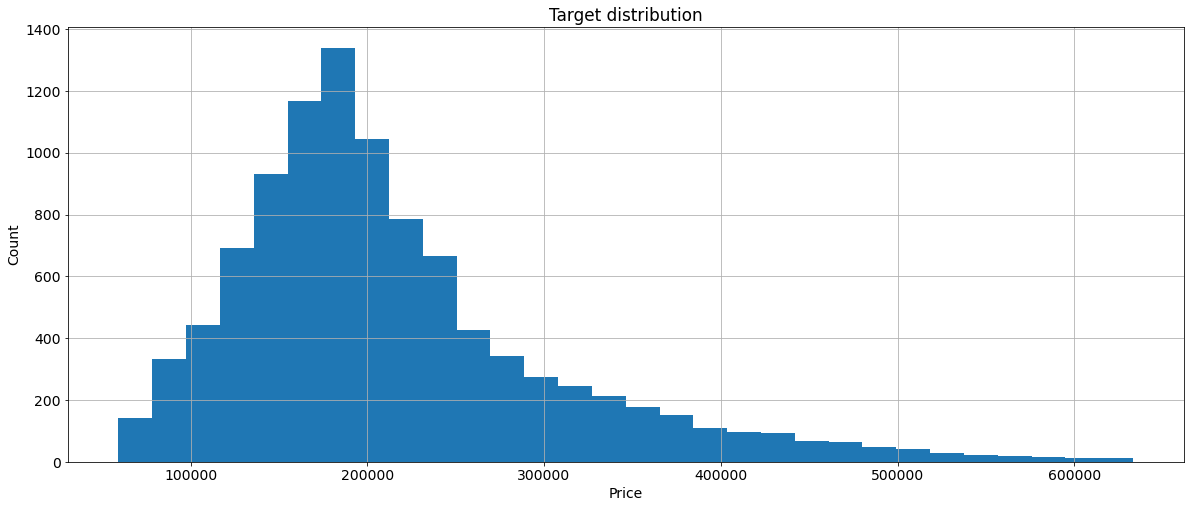

In [13]:
plt.figure(figsize = (20, 8))

train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

Количественные переменные

In [14]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Номинативные переменные

In [15]:
train_df.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [16]:
train_df['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
207      1
174      1
205      1
209      1
199      1
Name: DistrictId, Length: 205, dtype: int64

In [17]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [18]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [19]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

## 2. Обработка выбросов  
Что можно делать с ними?  

Выкинуть эти данные (только на трейне, на тесте ничего не выкидываем)  
Заменять выбросы разными методами (медианы, средние значения, np.clip и т.д.)  
Делать/не делать дополнительную признак  
Ничего не делать  

Rooms

In [20]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
6.0        1
19.0       1
Name: Rooms, dtype: int64

In [21]:
train_df['Rooms_outlier'] = 0  # Создание нового признака Rooms_outlier
train_df.loc[(train_df['Rooms'] == 0) | (train_df['Rooms'] >= 6), 'Rooms_outlier'] = 1  # Маркировка выбросов
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,...,B,11,3097,0,NaN,0,0,B,305018.871089,0
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,B,30,6207,1,1183.0,1,0,B,177734.553407,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,B,33,5261,0,240.0,3,1,B,282078.720850,0
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,...,B,1,264,0,NaN,0,1,B,168106.007630,0
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,B,33,8667,2,NaN,0,6,B,343995.102962,0


In [22]:
train_df.loc[train_df['Rooms'] == 0, 'Rooms'] = 1  # Заменяем выброс с нулем комнат на одну комнату
train_df.loc[train_df['Rooms'] >= 6, 'Rooms'] = train_df['Rooms'].median()  # Заменяем выброс >= 6 комнат на медиану

In [23]:
train_df['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

KitchenSquare

In [24]:
train_df_kitchen_square = train_df['KitchenSquare'].value_counts(dropna=False)
train_df_kitchen_square[sorted(train_df_kitchen_square.index)]

0.0        697
1.0       2460
2.0          4
3.0         22
4.0         39
5.0       1169
6.0       1038
7.0        609
8.0       1306
9.0        843
10.0      1075
11.0       233
12.0       249
13.0        67
14.0        51
15.0        31
16.0        16
17.0        12
18.0         6
19.0        11
20.0        14
21.0         1
22.0         3
23.0         1
25.0         2
26.0         1
27.0         1
29.0         1
30.0         2
31.0         1
32.0         2
35.0         1
36.0         1
37.0         2
39.0         1
40.0         1
41.0         2
42.0         1
43.0         2
48.0         1
51.0         2
53.0         1
54.0         1
58.0         2
60.0         1
62.0         1
63.0         1
66.0         1
72.0         1
73.0         1
75.0         1
78.0         1
84.0         1
96.0         1
112.0        2
123.0        1
1970.0       1
2014.0       1
Name: KitchenSquare, dtype: int64

In [25]:
train_df['KitchenSquare'].quantile(.975), train_df['KitchenSquare'].quantile(.025)

(13.0, 0.0)

In [26]:
condition = (train_df['KitchenSquare'].isna()) \
             | (train_df['KitchenSquare'] > 20)  # Series с True и False
        
train_df.loc[condition, 'KitchenSquare'] = train_df['KitchenSquare'].median()  # Заменяем значения с True на медиану

train_df.loc[train_df['KitchenSquare'] < 5, 'KitchenSquare'] = 5  # Заменяем значения < 5 на 5

In [27]:
train_df_kitchen_square = train_df['KitchenSquare'].value_counts()
train_df_kitchen_square[sorted(train_df_kitchen_square.index)]

5.0     4391
6.0     1086
7.0      609
8.0     1306
9.0      843
10.0    1075
11.0     233
12.0     249
13.0      67
14.0      51
15.0      31
16.0      16
17.0      12
18.0       6
19.0      11
20.0      14
Name: KitchenSquare, dtype: int64

HouseFloor, Floor

In [28]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [29]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [30]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

1825

In [31]:
train_df['HouseFloor_outlier'] = 0  # Создаем новый признак выброса в этажах
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1  # Нулевой этаж указываем выбросом (единицой) 
train_df.loc[train_df['Floor'] > train_df['HouseFloor'], 'HouseFloor_outlier'] = 1  # Выброс этаж больще этажности указываем "1"

In [32]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()  # Нулевой этаж меняем на медиану 

In [33]:
floor_outliers_indices = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index  # Индексы выбросов "этажей"
floor_outliers_indices

Int64Index([  17,   19,   21,   25,   26,   33,   34,   37,   39,   44,
            ...
            9913, 9921, 9930, 9931, 9938, 9953, 9960, 9968, 9970, 9975],
           dtype='int64', length=1610)

In [34]:
train_df.loc[floor_outliers_indices, 'Floor'] = train_df.loc[floor_outliers_indices, 'HouseFloor']\
                                                .apply(lambda x: random.randint(1, x))

In [35]:
train_df.loc[floor_outliers_indices, 'HouseFloor'].apply(lambda x: random.randint(1, x))

17      3
19      7
21      8
25      1
26      1
       ..
9953    1
9960    1
9968    3
9970    7
9975    1
Name: HouseFloor, Length: 1610, dtype: int64

In [36]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

0

HouseYear

In [37]:
train_df['HouseYear'].sort_values(ascending=False)

9163    20052011
8828        4968
7721        2020
9122        2020
7955        2020
          ...   
7610        1916
6250        1914
2066        1912
2795        1912
6794        1910
Name: HouseYear, Length: 10000, dtype: int64

In [38]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

## 3. Обработка пропусков

In [39]:
train_df.isna().sum()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare            2113
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4798
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Rooms_outlier            0
HouseFloor_outlier       0
dtype: int64

In [40]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

,Square,LifeSquare,KitchenSquare
0,115.027311,NaN,10.0
1,39.832524,23.169223,8.0
2,78.342215,47.671972,10.0
3,40.409907,NaN,5.0
4,64.285067,38.562517,9.0
5,62.528465,47.103833,6.0
6,33.938750,21.772930,9.0
7,50.391814,32.893256,8.0
8,46.887892,44.628132,5.0
9,79.867477,75.085125,5.0


LifeSquare

In [41]:
train_df['LifeSquare_nan'] = train_df['LifeSquare'].isna().astype(int)  # Создаём признак LifeSquare_nan бинарный

condition = (train_df['LifeSquare'].isna()) \
             & (~train_df['Square'].isna()) \
             & (~train_df['KitchenSquare'].isna())   # Условие того, что сможем посчитать LifeSquare (только LifeSquare=Nan)
        
train_df.loc[condition, 'LifeSquare'] = train_df.loc[condition, 'Square'] \
                                            - train_df.loc[condition, 'KitchenSquare'] - 3
train_df.isna().sum()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare               0
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4798
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Rooms_outlier            0
HouseFloor_outlier       0
LifeSquare_nan           0
dtype: int64

Healthcare_1

In [42]:
healthcare_1_df = train_df[~train_df['Healthcare_1'].isna()]  # Создание выборки для обучения регрессора (Healthcare_1 != Nan)
healthcare_1_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,6207,1,1183.0,1,0,B,177734.553407,0,0,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,5261,0,240.0,3,1,B,282078.720850,0,0,0
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,...,5776,1,2078.0,2,4,B,161044.944138,0,0,0
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,...,4860,1,80.0,0,3,B,142402.739272,0,0,0
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,...,7687,11,176.0,5,5,B,326174.175191,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,10635,21,1.0,18.983962,11.419796,5.0,1,5.0,1967,0.194489,...,8004,3,125.0,3,5,B,112411.221700,0,0,0
9991,11173,6,2.0,62.648779,54.648779,5.0,6,17.0,1977,0.243205,...,1564,0,540.0,0,0,B,182625.548872,0,0,1
9992,11753,37,2.0,50.902724,27.159548,6.0,4,9.0,1972,0.127812,...,7287,5,320.0,1,3,B,196641.468817,0,0,0
9994,4356,9,1.0,43.303458,21.519087,8.0,12,14.0,1992,0.161532,...,5648,1,30.0,2,4,B,136744.340827,0,0,0


In [43]:
healthcare_1_df = healthcare_1_df.drop(columns=healthcare_1_df.select_dtypes('object').columns)  # Дропаем категориальные признаки (для упрощения)
healthcare_1_df

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan
1,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,30,6207,1,1183.0,1,0,177734.553407,0,0,0
2,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,33,5261,0,240.0,3,1,282078.720850,0,0,0
5,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,35,5776,1,2078.0,2,4,161044.944138,0,0,0
6,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,24,4860,1,80.0,0,3,142402.739272,0,0,0
7,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,37,7687,11,176.0,5,5,326174.175191,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,1.0,18.983962,11.419796,5.0,1,5.0,1967,0.194489,47,8004,3,125.0,3,5,112411.221700,0,0,0
9991,2.0,62.648779,54.648779,5.0,6,17.0,1977,0.243205,5,1564,0,540.0,0,0,182625.548872,0,0,1
9992,2.0,50.902724,27.159548,6.0,4,9.0,1972,0.127812,28,7287,5,320.0,1,3,196641.468817,0,0,0
9994,1.0,43.303458,21.519087,8.0,12,14.0,1992,0.161532,25,5648,1,30.0,2,4,136744.340827,0,0,0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(healthcare_1_df.drop(columns=['Healthcare_1', 'Price']),
                                                    healthcare_1_df['Healthcare_1'], 
                                                    test_size=0.2, random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = lr.predict(X_test)

In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score(y_test, y_pred)

0.12723474188923845

In [51]:
y_test 

4894     830.0
144     2301.0
9374     540.0
4002    1322.0
8277    1322.0
         ...  
3117     750.0
1767      30.0
9362     176.0
88       628.0
4752    1340.0
Name: Healthcare_1, Length: 1041, dtype: float64

In [52]:
y_pred

array([1531.38796511, 1075.85925584,  605.83689694, ..., 1431.82186827,
        847.59842475, 1242.40037773])

In [53]:
rf = RandomForestRegressor()

In [54]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [55]:
y_pred = rf.predict(X_test)

In [56]:
r2_score(y_test, y_pred)

0.9996267648164817

In [57]:
y_test

4894     830.0
144     2301.0
9374     540.0
4002    1322.0
8277    1322.0
         ...  
3117     750.0
1767      30.0
9362     176.0
88       628.0
4752    1340.0
Name: Healthcare_1, Length: 1041, dtype: float64

In [58]:
y_pred

array([ 830., 2301.,  540., ...,  176.,  628., 1340.])

In [59]:
healthcare_1_df_nan = train_df[train_df['Healthcare_1'].isna()] 
healthcare_1_df_nan

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,...,3097,0,NaN,0,0,B,305018.871089,0,0,1
3,2352,1,1.0,40.409907,32.409907,5.0,10,22.0,1977,0.007122,...,264,0,NaN,0,1,B,168106.007630,0,0,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,8667,2,NaN,0,6,B,343995.102962,0,0,0
8,9951,1,1.0,46.887892,44.628132,5.0,12,20.0,1977,0.007122,...,264,0,NaN,0,1,B,160400.401732,0,0,0
11,16755,88,2.0,53.975144,34.153584,8.0,2,12.0,1978,0.127376,...,8429,3,NaN,3,9,B,253124.005332,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9289,1,3.0,84.486078,88.931509,5.0,4,22.0,2016,0.007122,...,264,0,NaN,0,1,B,264213.558631,0,0,0
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,...,10311,6,NaN,1,9,B,119367.455796,0,0,0
9996,16265,27,2.0,64.307684,37.038420,9.0,13,13.0,1977,0.072158,...,629,1,NaN,0,0,A,199715.148807,0,1,0
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,...,4386,14,NaN,1,5,B,165953.912580,0,0,0


In [60]:
healthcare_1_df_nan = healthcare_1_df_nan.drop(columns=healthcare_1_df_nan.select_dtypes('object').columns)
healthcare_1_df_nan

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan
0,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,11,3097,0,NaN,0,0,305018.871089,0,0,1
3,1.0,40.409907,32.409907,5.0,10,22.0,1977,0.007122,1,264,0,NaN,0,1,168106.007630,0,0,1
4,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,33,8667,2,NaN,0,6,343995.102962,0,0,0
8,1.0,46.887892,44.628132,5.0,12,20.0,1977,0.007122,1,264,0,NaN,0,1,160400.401732,0,0,0
11,2.0,53.975144,34.153584,8.0,2,12.0,1978,0.127376,43,8429,3,NaN,3,9,253124.005332,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,3.0,84.486078,88.931509,5.0,4,22.0,2016,0.007122,1,264,0,NaN,0,1,264213.558631,0,0,0
9995,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,52,10311,6,NaN,1,9,119367.455796,0,0,0
9996,2.0,64.307684,37.038420,9.0,13,13.0,1977,0.072158,2,629,1,NaN,0,0,199715.148807,0,1,0
9997,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,20,4386,14,NaN,1,5,165953.912580,0,0,0


In [61]:
# Заполняем пропуски в Healthcare_1 с помощью регрессора
train_df.loc[train_df['Healthcare_1'].isna(), 'Healthcare_1'] = \
    rf.predict(healthcare_1_df_nan.drop(columns=['Healthcare_1', 'Price']))  

In [62]:
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,...,3097,0,564.17,0,0,B,305018.871089,0,0,1
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,6207,1,1183.00,1,0,B,177734.553407,0,0,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,5261,0,240.00,3,1,B,282078.720850,0,0,0
3,2352,1,1.0,40.409907,32.409907,5.0,10,22.0,1977,0.007122,...,264,0,319.50,0,1,B,168106.007630,0,0,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,8667,2,1293.88,0,6,B,343995.102962,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,...,10311,6,1002.59,1,9,B,119367.455796,0,0,0
9996,16265,27,2.0,64.307684,37.038420,9.0,13,13.0,1977,0.072158,...,629,1,222.02,0,0,A,199715.148807,0,1,0
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,...,4386,14,1291.37,1,5,B,165953.912580,0,0,0
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,...,8004,3,125.00,3,5,B,171842.411855,0,0,0


In [63]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  10000 non-null  object 
 1   DistrictId          10000 non-null  object 
 2   Rooms               10000 non-null  float64
 3   Square              10000 non-null  float64
 4   LifeSquare          10000 non-null  float64
 5   KitchenSquare       10000 non-null  float64
 6   Floor               10000 non-null  int64  
 7   HouseFloor          10000 non-null  float64
 8   HouseYear           10000 non-null  int64  
 9   Ecology_1           10000 non-null  float64
 10  Ecology_2           10000 non-null  object 
 11  Ecology_3           10000 non-null  object 
 12  Social_1            10000 non-null  int64  
 13  Social_2            10000 non-null  int64  
 14  Social_3            10000 non-null  int64  
 15  Healthcare_1        10000 non-null  float64
 16  Helth

Создание класса предобработки

In [64]:
class DataPreprocessor:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.healthcare_1_predictor = None
        # self.kitchen_square_quantile = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        # self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
                
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        
        # KitchenSquare
        condition = (X['KitchenSquare'].isna()) \
                    | (X['KitchenSquare'] > 20)
        
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']

        X.loc[X['KitchenSquare'] < 5, 'KitchenSquare'] = 5
        
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))
        
        # HouseYear
        current_year = datetime.now().year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
            
        # LifeSquare
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        condition = (X['LifeSquare'].isna()) & \
                      (~X['Square'].isna()) & \
                      (~X['KitchenSquare'].isna())
        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] - 3
        
        # Healthcare_1       
        if self.healthcare_1_predictor is None:
            self._fit_healthcare_1(X)
            
        self._predict_healthcare_1(X)
        
        return X
            
    def _fit_healthcare_1(self, X):
        """Обучение регрессора для заполнения NaN в Healthcare_1"""  
        self.healthcare_1_predictor = RandomForestRegressor()
        X = X.drop(columns=X.select_dtypes('object').columns)
        X_not_nan_healthcare_1 = X.loc[~X['Healthcare_1'].isna()]
        self.healthcare_1_predictor.fit(X_not_nan_healthcare_1.drop(columns='Healthcare_1'), 
                                        X_not_nan_healthcare_1['Healthcare_1'])
        
    def _predict_healthcare_1(self, X):
        """Заполнение NaN в Healthcare_1"""
        X_drop = X.drop(columns=X.select_dtypes('object').columns)
        X_nan_healthcare_1 = X_drop.loc[X_drop['Healthcare_1'].isna()]
        healthcare_1_pred = self.healthcare_1_predictor.predict(X_nan_healthcare_1.drop(columns='Healthcare_1'))
        X.loc[X['Healthcare_1'].isna(), 'Healthcare_1'] = healthcare_1_pred
        return X       


In [65]:
train_df = pd.read_csv(TRAIN_DATASET_PATH, delimiter=';')
test_df = pd.read_csv(TEST_DATASET_PATH, delimiter=';')

In [66]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(columns='Price'), train_df['Price'], 
                                                    test_size=0.2, random_state=42)

In [67]:
proccessor = DataPreprocessor()

In [68]:
proccessor.fit(X_train)

In [69]:
X_train = proccessor.transform(X_train)

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 9254 to 7270
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  8000 non-null   int64  
 1   DistrictId          8000 non-null   int64  
 2   Rooms               8000 non-null   float64
 3   Square              8000 non-null   float64
 4   LifeSquare          8000 non-null   float64
 5   KitchenSquare       8000 non-null   float64
 6   Floor               8000 non-null   int64  
 7   HouseFloor          8000 non-null   float64
 8   HouseYear           8000 non-null   int64  
 9   Ecology_1           8000 non-null   float64
 10  Ecology_2           8000 non-null   object 
 11  Ecology_3           8000 non-null   object 
 12  Social_1            8000 non-null   int64  
 13  Social_2            8000 non-null   int64  
 14  Social_3            8000 non-null   int64  
 15  Healthcare_1        8000 non-null   float64
 16  Hel

In [71]:
X_test = proccessor.transform(X_test)

In [72]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 6252 to 6929
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  2000 non-null   int64  
 1   DistrictId          2000 non-null   int64  
 2   Rooms               2000 non-null   float64
 3   Square              2000 non-null   float64
 4   LifeSquare          2000 non-null   float64
 5   KitchenSquare       2000 non-null   float64
 6   Floor               2000 non-null   int64  
 7   HouseFloor          2000 non-null   float64
 8   HouseYear           2000 non-null   int64  
 9   Ecology_1           2000 non-null   float64
 10  Ecology_2           2000 non-null   object 
 11  Ecology_3           2000 non-null   object 
 12  Social_1            2000 non-null   int64  
 13  Social_2            2000 non-null   int64  
 14  Social_3            2000 non-null   int64  
 15  Healthcare_1        2000 non-null   float64
 16  Hel

## 4. Построение новых признаков

### Dummies

In [73]:
binary_to_numbers = {'A': 0, 'B': 1}

train_df['Ecology_2'] = train_df['Ecology_2'].replace(binary_to_numbers)
train_df['Ecology_3'] = train_df['Ecology_3'].replace(binary_to_numbers)
train_df['Shops_2'] = train_df['Shops_2'].replace(binary_to_numbers)

In [74]:
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,NaN,0,0,1,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1183.0,1,0,1,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,240.0,3,1,1,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,1,1,1,264,0,NaN,0,1,1,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,NaN,0,6,1,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,1,1,52,10311,6,NaN,1,9,1,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,1,1,2,629,1,NaN,0,0,0,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,1,1,20,4386,14,NaN,1,5,1,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,1,1,47,8004,3,125.0,3,5,1,171842.411855


## DistrictSize, IsDistrictLarge

In [75]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size.head()

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [76]:
train_df = train_df.merge(district_size, on='DistrictId', how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,...,1,11,3097,0,NaN,0,0,1,305018.871089,851
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1,30,6207,1,1183.0,1,0,1,177734.553407,78
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,1,33,5261,0,240.0,3,1,1,282078.720850,652
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,...,1,1,264,0,NaN,0,1,1,168106.007630,652
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,1,33,8667,2,NaN,0,6,1,343995.102962,89


In [77]:
(train_df['DistrictSize'] > 100).value_counts()

True     5069
False    4931
Name: DistrictSize, dtype: int64

In [78]:
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)

## MedPriceByDistrict

In [79]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head(20)

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146735.671740
4,1,2.0,202706.090239
5,1,3.0,244005.272380
6,1,4.0,277290.705058
7,1,19.0,78364.616704
8,2,1.0,174545.972737
9,2,2.0,215477.288974


In [80]:
med_price_by_district.shape

(675, 3)

In [81]:
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train_df.head(25)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,...,3097,0,NaN,0,0,1,305018.871089,851,1,213530.788443
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,6207,1,1183.0,1,0,1,177734.553407,78,0,146032.829834
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,5261,0,240.0,3,1,1,282078.720850,652,1,244005.272380
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,...,264,0,NaN,0,1,1,168106.007630,652,1,146735.671740
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,8667,2,NaN,0,6,1,343995.102962,89,0,201584.441255
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,...,5776,1,2078.0,2,4,1,161044.944138,97,0,223960.229617
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,...,4860,1,80.0,0,3,1,142402.739272,104,1,171145.169069
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,...,7687,11,176.0,5,5,1,326174.175191,67,0,326174.175191
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,...,264,0,NaN,0,1,1,160400.401732,652,1,146735.671740
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,...,1564,0,540.0,0,0,1,194756.023945,511,1,215707.925347


## MedPriceByFloorYear

In [82]:
def floor_to_cat(X):

    X['floor_cat'] = 0

    X.loc[X['Floor'] <= 3, 'floor_cat'] = 1  
    X.loc[(X['Floor'] > 3) & (X['Floor'] <= 5), 'floor_cat'] = 2
    X.loc[(X['Floor'] > 5) & (X['Floor'] <= 9), 'floor_cat'] = 3
    X.loc[(X['Floor'] > 9) & (X['Floor'] <= 15), 'floor_cat'] = 4
    X.loc[X['Floor'] > 15, 'floor_cat'] = 5

    return X


def floor_to_cat_pandas(X):
    bins = [X['Floor'].min(), 3, 5, 9, 15, X['Floor'].max()]
    X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)
    
    X['floor_cat'].fillna(-1, inplace=True)
    return X


def year_to_cat(X):

    X['year_cat'] = 0

    X.loc[X['HouseYear'] <= 1941, 'year_cat'] = 1
    X.loc[(X['HouseYear'] > 1941) & (X['HouseYear'] <= 1945), 'year_cat'] = 2
    X.loc[(X['HouseYear'] > 1945) & (X['HouseYear'] <= 1980), 'year_cat'] = 3
    X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 2000), 'year_cat'] = 4
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2010), 'year_cat'] = 5
    X.loc[(X['HouseYear'] > 2010), 'year_cat'] = 6

    return X


def year_to_cat_pandas(X):
    bins = [X['HouseYear'].min(), 1941, 1945, 1980, 2000, 2010, X['HouseYear'].max()]
    X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)
    
    X['year_cat'].fillna(-1, inplace=True)
    return X

In [83]:
bins = [train_df['Floor'].min(), 3, 5, 9, 15, train_df['Floor'].max()]
pd.cut(train_df['Floor'], bins=bins, labels=False)

0       1.0
1       2.0
2       0.0
3       3.0
4       4.0
       ... 
9995    0.0
9996    3.0
9997    0.0
9998    0.0
9999    2.0
Name: Floor, Length: 10000, dtype: float64

In [84]:
bins = [train_df['Floor'].min(), 3, 5, 9, 15, train_df['Floor'].max()]
pd.cut(train_df['Floor'], bins=bins)

0         (3, 5]
1         (5, 9]
2         (1, 3]
3        (9, 15]
4       (15, 42]
          ...   
9995      (1, 3]
9996     (9, 15]
9997      (1, 3]
9998      (1, 3]
9999      (5, 9]
Name: Floor, Length: 10000, dtype: category
Categories (5, interval[int64]): [(1, 3] < (3, 5] < (5, 9] < (9, 15] < (15, 42]]

In [85]:
train_df = year_to_cat(train_df)
train_df = floor_to_cat(train_df)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,IsDistrictLarge,MedPriceByDistrict,year_cat,floor_cat
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,...,NaN,0,0,1,305018.871089,851,1,213530.788443,6,2
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1183.0,1,0,1,177734.553407,78,0,146032.829834,3,3
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,240.0,3,1,1,282078.720850,652,1,244005.272380,4,1
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,...,NaN,0,1,1,168106.007630,652,1,146735.671740,3,4
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,NaN,0,6,1,343995.102962,89,0,201584.441255,3,5


In [86]:
med_price_by_floor_year = train_df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
med_price_by_floor_year.head()

,year_cat,floor_cat,MedPriceByFloorYear
0,1,1,380359.112959
1,1,2,321497.418777
2,1,3,368718.236013
3,1,4,400715.465642
4,2,1,467230.539057


In [87]:
train_df = train_df.merge(med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,IsDistrictLarge,MedPriceByDistrict,year_cat,floor_cat,MedPriceByFloorYear
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,...,0,0,1,305018.871089,851,1,213530.788443,6,2,161246.069193
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1,0,1,177734.553407,78,0,146032.829834,3,3,188098.168461
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,3,1,1,282078.720850,652,1,244005.272380,4,1,204940.082609
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,...,0,1,1,168106.007630,652,1,146735.671740,3,4,185190.984473
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,0,6,1,343995.102962,89,0,201584.441255,3,5,181281.815896


In [88]:
class FeatureGenetator:
    """Генерация новых признаков"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        self.house_year_max = None
        self.floor_max = None
        self.house_year_min = None
        self.floor_min = None
        self.district_size = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
                
        # Target encoding
        ## District, Rooms
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistrict'})
            
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
            
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.floor_min = df['Floor'].min()
            self.house_year_max = df['HouseYear'].max()
            self.house_year_min = df['HouseYear'].min()
            df['Price'] = y.values
            df = self._floor_to_cat(df)
            df = self._year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
        

        
    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1
        
        X['DistrictSize'].fillna(5, inplace=True)
        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        
        # More categorical features
        X = self._floor_to_cat(X)  # + столбец floor_cat
        X = self._year_to_cat(X)   # + столбец year_cat
        
        # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
            X['MedPriceByDistrict'].fillna(self.med_price_by_district_median, inplace=True)
            
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            X['MedPriceByFloorYear'].fillna(self.med_price_by_floor_year_median, inplace=True)
        
        return X
    
    def _floor_to_cat(self, X):
        bins = [self.floor_min, 3, 5, 9, 15, self.floor_max]
        X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)

        X['floor_cat'].fillna(-1, inplace=True)
        return X
     
    def _year_to_cat(self, X):
        bins = [self.house_year_min, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)

        X['year_cat'].fillna(-1, inplace=True)
        return X

## 5. Выбор признаков

In [89]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict',
 'year_cat',
 'floor_cat',
 'MedPriceByFloorYear']

In [90]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
                 'Helthcare_2', 'Shops_1', 'Shops_2']

new_feature_names = ['Rooms_outlier', 'HouseFloor_outlier', 'HouseYear_outlier', 'LifeSquare_nan', 'DistrictSize',
                     'new_district', 'IsDistrictLarge', 'MedPriceByDistrict', 'MedPriceByFloorYear']

target_name = 'Price'

## 6. Разбиение на train и test

In [91]:
train_df = pd.read_csv(TRAIN_DATASET_PATH, delimiter=';')
test_df = pd.read_csv(TEST_DATASET_PATH, delimiter=';')

X = train_df.drop(columns=target_name)
y = train_df[target_name]

In [92]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [93]:
preprocessor = DataPreprocessor()

preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 23), (3300, 23), (5000, 23))

In [94]:
features_gen = FeatureGenetator()
features_gen.fit(X_train, y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_df = features_gen.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 30), (3300, 30), (5000, 30))

In [95]:
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]
test_df = test_df[feature_names + new_feature_names]

In [96]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0, 0)

## 7. Построение модели

### Обучение

In [97]:
rf_model = RandomForestRegressor(random_state=21, n_estimators=50, criterion='mse')
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=21)

### Оценка модели

Train R2:	0.964
Test R2:	0.702


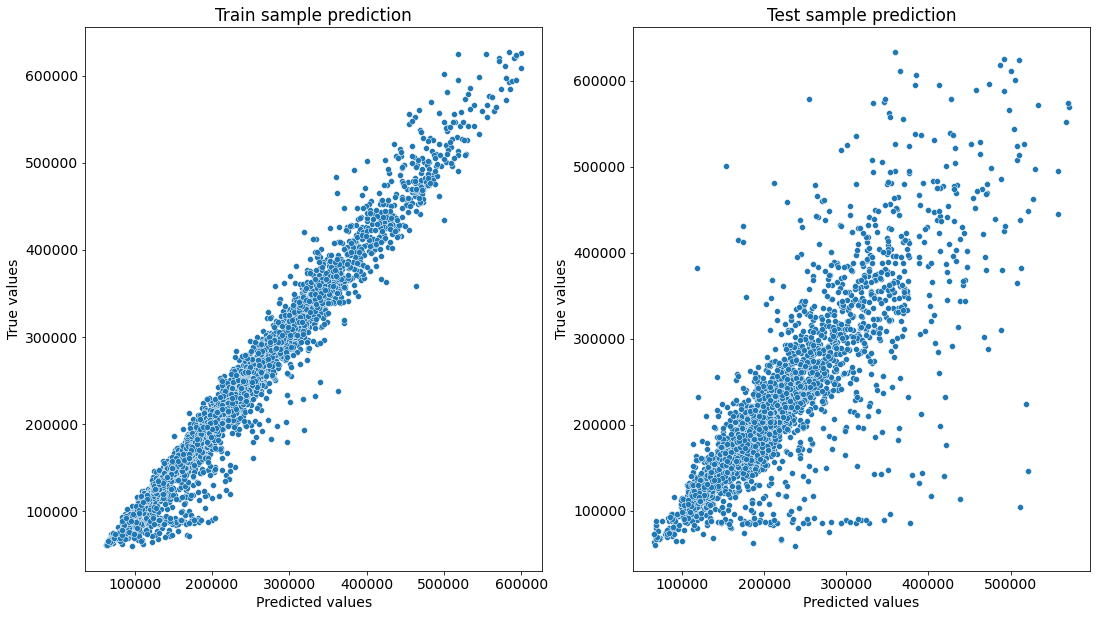

In [98]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

### Кросс-валидация

In [99]:
cv_score = cross_val_score(rf_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.76960635, 0.71878164, 0.74489253])

In [100]:
cv_score.mean()

0.7444268426132519

### Важность признаков

In [101]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
24,MedPriceByDistrict,6.494033e-01
1,Square,1.054187e-01
2,LifeSquare,3.141387e-02
25,MedPriceByFloorYear,2.202067e-02
6,HouseYear,2.154055e-02
5,HouseFloor,2.014073e-02
13,Healthcare_1,1.949973e-02
3,KitchenSquare,1.937755e-02
21,DistrictSize,1.776921e-02
12,Social_3,1.754289e-02


### Идея более сложных моделей:

catboost, lightgbm, xgboost

In [102]:
from sklearn.ensemble import StackingRegressor, VotingRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
gb = GradientBoostingRegressor()

stack = StackingRegressor([('lr', lr), ('rf', rf_model)], final_estimator=gb)
stack.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf',
                               RandomForestRegressor(n_estimators=50,
                                                     random_state=21))],
                  final_estimator=GradientBoostingRegressor())

Train R2:	0.924
Test R2:	0.695


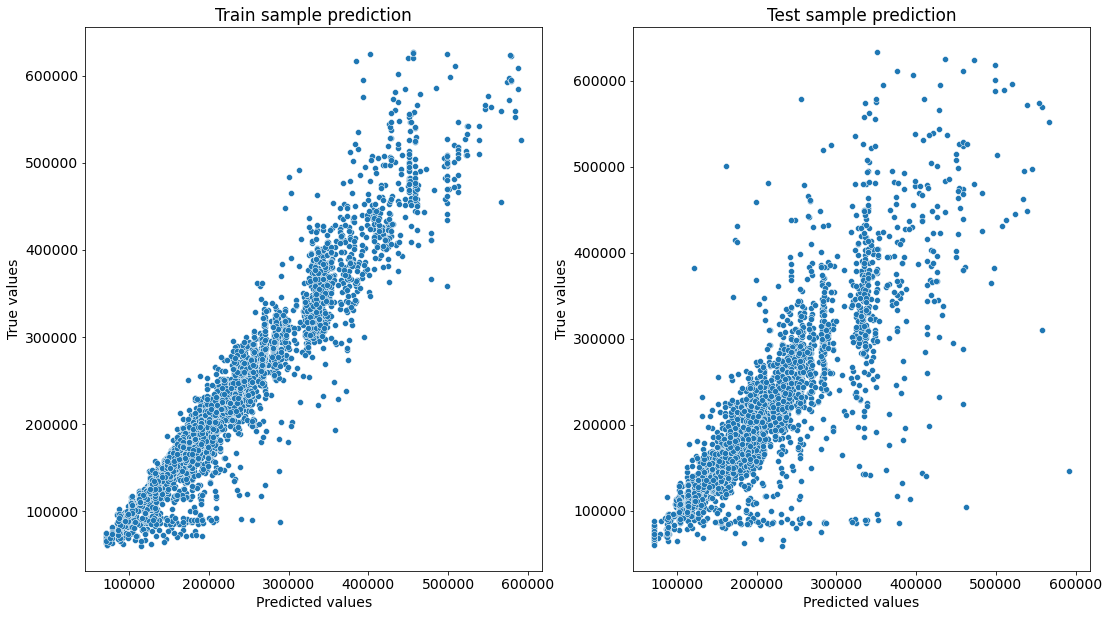

In [103]:
y_train_preds = stack.predict(X_train)
y_test_preds = stack.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

## 8. Прогнозирование на тестовом датасете

1. Выполнить для тестового датасета те же этапы обработки и постронияния признаков
2. Не потерять и не перемешать индексы от примеров при построении прогнозов
3. Прогнозы должны быть для всех примеров из тестового датасета (для всех строк)

In [104]:
test_df.shape

(5000, 26)

In [105]:
test_df

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Shops_2,Rooms_outlier,HouseFloor_outlier,HouseYear_outlier,LifeSquare_nan,DistrictSize,new_district,IsDistrictLarge,MedPriceByDistrict,MedPriceByFloorYear
0,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,1,1,...,1,0,0,0,0,76.0,0,0,171145.169069,189115.338060
1,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,1,1,...,0,0,0,0,0,164.0,0,1,131107.271962,178002.288378
2,2.0,59.463678,47.463678,9.0,19,19.0,1977,0.211401,1,1,...,1,0,0,0,1,580.0,0,1,165993.292450,172123.099004
3,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,1,1,...,1,0,0,0,0,372.0,0,1,172778.615365,181626.175103
4,1.0,53.837056,45.837056,5.0,8,17.0,1977,0.309479,1,1,...,1,0,0,0,1,65.0,0,0,164116.183543,191800.737823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.0,43.177521,30.339945,5.0,4,5.0,1962,0.069660,1,1,...,1,0,1,0,0,56.0,0,0,183575.963167,189115.338060
4996,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,1,1,...,1,0,0,0,0,26.0,0,0,425037.641820,193054.222191
4997,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,1,1,...,1,0,0,0,0,54.0,0,0,156266.487610,181626.175103
4998,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,1,1,...,1,0,0,0,0,40.0,0,0,185704.766694,191800.737823


In [106]:
submit = pd.read_csv('C:\\Users\\George\\Desktop\\sample_submission.csv', delimiter=';')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [107]:
predictions = rf_model.predict(test_df)
predictions

array([158062.72048753, 119856.82969737, 138529.11663688, ...,
       148706.93481972, 190615.39072063, 251630.18696199])

In [108]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,158062.720488
1,5925,119856.829697
2,960,138529.116637
3,3848,150852.951380
4,746,175221.199041


In [109]:
submit.to_csv('C:\\Users\\George\\Desktop\\rf_submit.csv', index=False)